# Входное тестирование

## Описание данных

    Вам представлены данные о доходах сотрудников участка горячего проката за год, в том числе данные, описывающие специфику рабочих мест.
    Доход состоит из оклада, премии, доплат и индивидуальных надбавок. Данных об их размерах не приводится, так как именно их Вам предстоит восстановить.



## Задание

    Выявите формулу дохода в целом и его составных частей
    Проверьте, что данная формула объясняет доход с точностью до рубля
    Выявите зависимости между составными частями дохода



### Итоговую формулу напишите, пожалуйста, в теле письма или в Word. Все расчеты и объяснения приложите отдельным файлом.

Подключение библиотек и скриптов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Загрузка файла

In [2]:
file = 'epc.csv'

Первичный анализ данных

In [3]:
df = pd.read_csv(file, sep=',')
df.head()

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход
0,Абрамов Е. Д.,January 2009,Уборщик,3,Пилигримовые станы,18,580,"16,638"
1,Абрамов Е. Д.,February 2009,Уборщик,3,Пилигримовые станы,18,790,"16,638"
2,Абрамов Е. Д.,March 2009,Уборщик,3,Пилигримовые станы,18,820,"16,638"
3,Абрамов Е. Д.,April 2009,Уборщик,3,Пилигримовые станы,18,1200,"19,396"
4,Абрамов Е. Д.,May 2009,Уборщик,3,Пилигримовые станы,18,1250,"19,790"


In [4]:
df.dtypes

FIO                   object
Месяц                 object
Профессия             object
Разряд                 int64
Оборудование          object
Вредность (балл.)      int64
Объем производства     int64
Доход                 object
dtype: object

Количество строк в датасете:

In [5]:
print('Строк в трейне:', df.shape[0])

Строк в трейне: 2400


Количественные переменные

In [6]:
df.describe()

,Разряд,Вредность (балл.),Объем производства
count,2400.000000,2400.000000,2400.000000
mean,4.900000,15.785000,988.333333
std,1.371417,6.567857,230.982220
min,3.000000,0.000000,580.000000
25%,4.000000,14.750000,805.000000
50%,5.000000,18.000000,985.000000
75%,6.000000,19.000000,1185.000000
max,7.000000,22.000000,1400.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FIO                 2400 non-null   object
 1   Месяц               2400 non-null   object
 2   Профессия           2400 non-null   object
 3   Разряд              2400 non-null   int64 
 4   Оборудование        2400 non-null   object
 5   Вредность (балл.)   2400 non-null   int64 
 6   Объем производства  2400 non-null   int64 
 7   Доход               2400 non-null   object
dtypes: int64(3), object(5)
memory usage: 150.1+ KB


Номинативные переменные

In [8]:
df.select_dtypes(include=['category','object']).columns.tolist()

['FIO', 'Месяц', 'Профессия', 'Оборудование', 'Доход']

In [9]:
df['FIO'].value_counts()

Суворов И. Р.     12
Петров А. Е.      12
Белкин Г. В.      12
Осипов П. В.      12
Новиков С. М.     12
                  ..
Соловьев И. М.    12
Потапов М. И.     12
Щербаков А. М.    12
Карпов А. М.      12
Васильев С. В.    12
Name: FIO, Length: 200, dtype: int64

In [10]:
df['Месяц'].value_counts()

July 2009         200
January 2009      200
December 2009     200
September 2009    200
April 2009        200
March 2009        200
November 2009     200
August 2009       200
February 2009     200
October 2009      200
May 2009          200
June 2009         200
Name: Месяц, dtype: int64

In [11]:
df['Профессия'].value_counts()

Вальцовщик                              612
Нагревальщик металла                    504
Подручный вальцовщика                   360
Оператор поста управления               324
Уборщик                                 252
Контролер качества готовой продукции    108
Посадчик металла                         96
Резчик горячего металла                  84
Огнеупорщик                              60
Name: Профессия, dtype: int64

In [12]:
df['Оборудование'].value_counts()

Пилигримовые станы                     708
Нагревательные печи                    456
Калибровочный стан                     372
Прошивной стан                         372
Вспомогательные помещения              108
Нагревательные печи, нагрев            108
Контрольно-измерительная аппаратура    108
Нагревательные печи, кантовка           96
Калибровочный стан, ГРП                 72
Name: Оборудование, dtype: int64

In [13]:
df['Доход'].value_counts()

  15,420     75
  20,350     50
  15,570     50
  22,260     45
  18,077     45
             ..
  16,156      1
  27,549      1
  19,077      1
  19,871      1
  15,211      1
Name: Доход, Length: 316, dtype: int64

Обрабатываем номинативные переменные столбцов 'Профессия', 'Оборудование', как бинарные (дамми) переменные

In [14]:
df = pd.concat([df, pd.get_dummies(df.Профессия, prefix='Профессия_')], axis=1, sort=False)  
df = df.drop(['Профессия'], axis=1)
df.head(3)

,FIO,Месяц,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход,Профессия__Вальцовщик,Профессия__Контролер качества готовой продукции,Профессия__Нагревальщик металла,Профессия__Огнеупорщик,Профессия__Оператор поста управления,Профессия__Подручный вальцовщика,Профессия__Посадчик металла,Профессия__Резчик горячего металла,Профессия__Уборщик
0,Абрамов Е. Д.,January 2009,3,Пилигримовые станы,18,580,"16,638",0,0,0,0,0,0,0,0,1
1,Абрамов Е. Д.,February 2009,3,Пилигримовые станы,18,790,"16,638",0,0,0,0,0,0,0,0,1
2,Абрамов Е. Д.,March 2009,3,Пилигримовые станы,18,820,"16,638",0,0,0,0,0,0,0,0,1


In [15]:
df = pd.concat([df, pd.get_dummies(df.Оборудование, prefix='Оборудование_')], axis=1, sort=False)  
df = df.drop(['Оборудование'], axis=1)
df.head(3)

,FIO,Месяц,Разряд,Вредность (балл.),Объем производства,Доход,Профессия__Вальцовщик,Профессия__Контролер качества готовой продукции,Профессия__Нагревальщик металла,Профессия__Огнеупорщик,...,Профессия__Уборщик,Оборудование__Вспомогательные помещения,Оборудование__Калибровочный стан,"Оборудование__Калибровочный стан, ГРП",Оборудование__Контрольно-измерительная аппаратура,Оборудование__Нагревательные печи,"Оборудование__Нагревательные печи, кантовка","Оборудование__Нагревательные печи, нагрев",Оборудование__Пилигримовые станы,Оборудование__Прошивной стан
0,Абрамов Е. Д.,January 2009,3,18,580,"16,638",0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,Абрамов Е. Д.,February 2009,3,18,790,"16,638",0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,Абрамов Е. Д.,March 2009,3,18,820,"16,638",0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


Поскольку данные показывают, что доход от количества дней в месяце не зависит, удаляем данный столбец из дальнейших 
расчетов

In [16]:
df = df.drop(['Месяц'], axis=1)
df.head(3)

,FIO,Разряд,Вредность (балл.),Объем производства,Доход,Профессия__Вальцовщик,Профессия__Контролер качества готовой продукции,Профессия__Нагревальщик металла,Профессия__Огнеупорщик,Профессия__Оператор поста управления,...,Профессия__Уборщик,Оборудование__Вспомогательные помещения,Оборудование__Калибровочный стан,"Оборудование__Калибровочный стан, ГРП",Оборудование__Контрольно-измерительная аппаратура,Оборудование__Нагревательные печи,"Оборудование__Нагревательные печи, кантовка","Оборудование__Нагревательные печи, нагрев",Оборудование__Пилигримовые станы,Оборудование__Прошивной стан
0,Абрамов Е. Д.,3,18,580,"16,638",0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,Абрамов Е. Д.,3,18,790,"16,638",0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,Абрамов Е. Д.,3,18,820,"16,638",0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


Преобразуем колонку 'Доход' в числовой формат

In [17]:
df['Доход'] = df['Доход'].str.replace(',','').astype(int)

In [18]:
df['Доход'].value_counts()

15420    75
20350    50
15570    50
26403    45
18077    45
         ..
21180     1
17689     1
17733     1
19077     1
18437     1
Name: Доход, Length: 316, dtype: int64

## Анализируя данные видим, что доход зависит от объема производства нелинейным характером, поэтому частично объединяем эту категорию, а также разбиваем как бинарные (дамми) переменные

In [19]:
df['Объем производства'].value_counts()

1400    200
1250    200
1200    200
1180    200
1080    200
1020    200
950     200
820     200
810     200
790     200
780     200
580     200
Name: Объем производства, dtype: int64

In [20]:
df['Объем производства'] = df['Объем производства'].astype(str)

In [21]:
df.rename(columns = {'Объем производства':'Объем_производства'}, inplace = True)

In [22]:
df['Объем_производства'] = df['Объем_производства'].map({'580': 'Basic', '780': 'Basic', '790': 'Basic', '810': 'Basic',
                               '820': 'Basic', '950': 'Extra_1', '1020': 'Extra_2', '1080': 'Extra_3',
                               '1180': 'Extra_4', '1200': 'Extra_5', '1250': 'Extra_6', '1400': 'Extra_7'})
df.head()

,FIO,Разряд,Вредность (балл.),Объем_производства,Доход,Профессия__Вальцовщик,Профессия__Контролер качества готовой продукции,Профессия__Нагревальщик металла,Профессия__Огнеупорщик,Профессия__Оператор поста управления,...,Профессия__Уборщик,Оборудование__Вспомогательные помещения,Оборудование__Калибровочный стан,"Оборудование__Калибровочный стан, ГРП",Оборудование__Контрольно-измерительная аппаратура,Оборудование__Нагревательные печи,"Оборудование__Нагревательные печи, кантовка","Оборудование__Нагревательные печи, нагрев",Оборудование__Пилигримовые станы,Оборудование__Прошивной стан
0,Абрамов Е. Д.,3,18,Basic,16638,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,Абрамов Е. Д.,3,18,Basic,16638,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,Абрамов Е. Д.,3,18,Basic,16638,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,Абрамов Е. Д.,3,18,Extra_5,19396,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,Абрамов Е. Д.,3,18,Extra_6,19790,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [23]:
df = pd.concat([df, pd.get_dummies(df.Объем_производства, prefix='Объем_производства_')], axis=1, sort=False)  
df = df.drop(['Объем_производства'], axis=1)
df.head(3)

,FIO,Разряд,Вредность (балл.),Доход,Профессия__Вальцовщик,Профессия__Контролер качества готовой продукции,Профессия__Нагревальщик металла,Профессия__Огнеупорщик,Профессия__Оператор поста управления,Профессия__Подручный вальцовщика,...,Оборудование__Пилигримовые станы,Оборудование__Прошивной стан,Объем_производства__Basic,Объем_производства__Extra_1,Объем_производства__Extra_2,Объем_производства__Extra_3,Объем_производства__Extra_4,Объем_производства__Extra_5,Объем_производства__Extra_6,Объем_производства__Extra_7
0,Абрамов Е. Д.,3,18,16638,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,Абрамов Е. Д.,3,18,16638,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,Абрамов Е. Д.,3,18,16638,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


Сначала преобразуем объем производства к строковому формату

## Определяем формулу дохода сотрудников методом линейной регрессии

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
target_name = 'Доход'

In [27]:
X = df.drop(['Доход', 'FIO'], axis=1)
Y = df[target_name]

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, shuffle=True, random_state=21)

In [29]:
print('Строк в тренировочной выборке:', X_train.shape[0])
print('Строк в тестовой выборке:', X_test.shape[0])

Строк в тренировочной выборке: 1608
Строк в тестовой выборке: 792


In [30]:
X.head()

,Разряд,Вредность (балл.),Профессия__Вальцовщик,Профессия__Контролер качества готовой продукции,Профессия__Нагревальщик металла,Профессия__Огнеупорщик,Профессия__Оператор поста управления,Профессия__Подручный вальцовщика,Профессия__Посадчик металла,Профессия__Резчик горячего металла,...,Оборудование__Пилигримовые станы,Оборудование__Прошивной стан,Объем_производства__Basic,Объем_производства__Extra_1,Объем_производства__Extra_2,Объем_производства__Extra_3,Объем_производства__Extra_4,Объем_производства__Extra_5,Объем_производства__Extra_6,Объем_производства__Extra_7
0,3,18,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,3,18,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,3,18,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,3,18,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,3,18,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [31]:
lr = LinearRegression()

In [32]:
lr.fit(X_train, Y_train)

LinearRegression()

In [33]:
def model_test(model, name, test, valid):
    model_pred = model.predict(test)
    r2 = r2_score(valid, model_pred)
    mse = mean_squared_error(valid, model_pred)
    plt.scatter(valid, (model_pred - valid))
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.title(name)
    plt.legend([f'R2= {r2:.4f} and mse= {mse:.0e}'])
    plt.axhline(0, color='red')
    plt.show()

In [34]:
from sklearn.metrics import r2_score

In [35]:
from sklearn.metrics import mean_squared_error

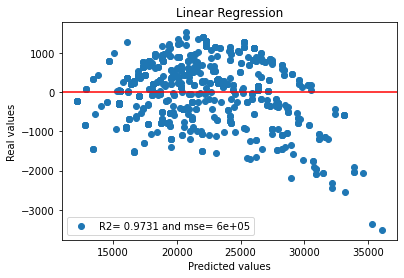

In [36]:
model_test(lr, 'Linear Regression', X_test, Y_test)

In [37]:
r2 = r2_score(Y_test, lr.predict(X_test))
print(r2)

0.9731433745864841


 !!! Вывод: точность модели недостаточная!!!

Смотрим расчетные коэффициенты линейной регрессии.

In [38]:
lr.coef_

array([ 3.01420685e+03, -3.83091090e+14,  3.76410764e+14,  1.39651900e+14,
        6.03163829e+15,  1.81763630e+15, -3.45450014e+15,  3.76410764e+14,
        6.03163829e+15, -3.89771416e+14,  3.76410764e+14, -5.57974944e+14,
        6.33766468e+15,  6.33766468e+15, -3.21216081e+14,  2.21480151e+15,
        2.21480151e+15,  2.21480151e+15,  6.33766468e+15,  6.33766468e+15,
       -2.95541916e+14, -2.95541916e+14, -2.95541916e+14, -2.95541916e+14,
       -2.95541916e+14, -2.95541916e+14, -2.95541916e+14, -2.95541916e+14])

In [39]:
len(lr.coef_)

28